In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_num=data[["Age","Fare","SibSp","Parch"]]
data_cat=data[["PassengerId","Survived","Pclass","Embarked","Sex","Cabin"]]

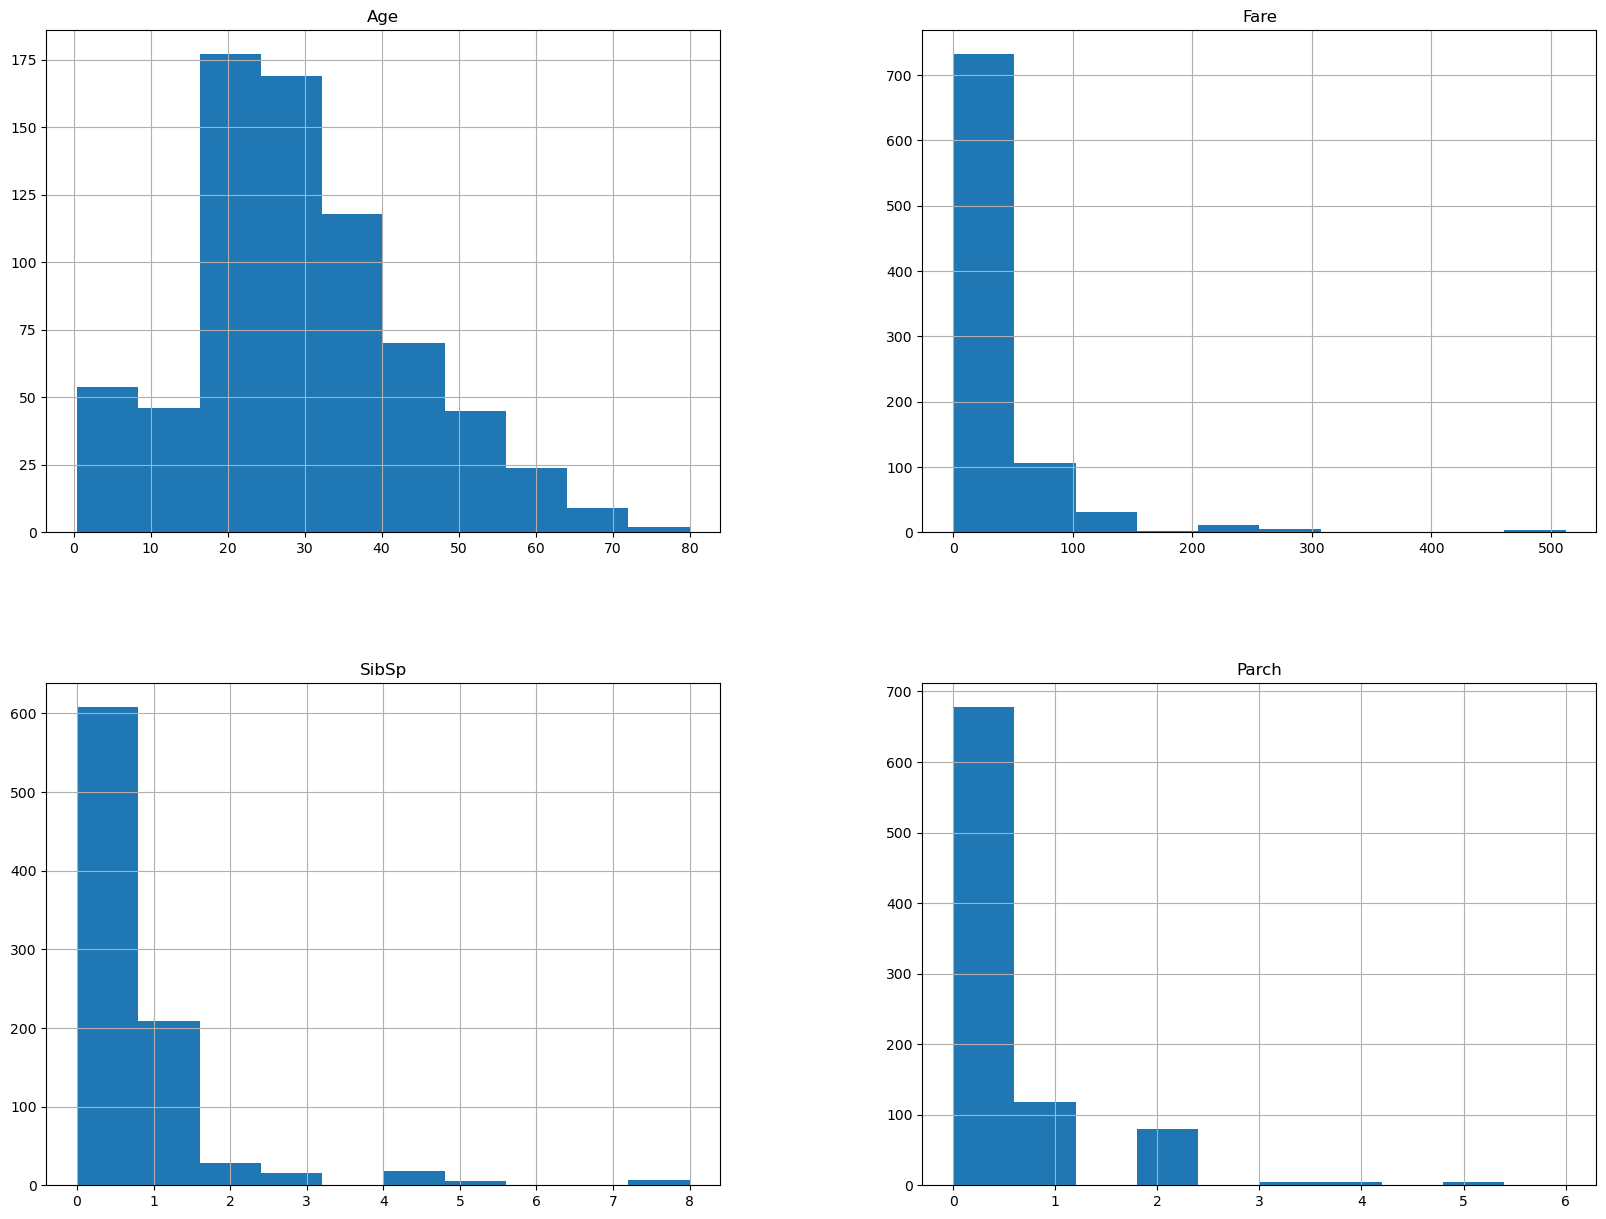

In [137]:
data_num.hist(figsize=(20,15))
plt.show()

<Figure size 1000x1000 with 0 Axes>

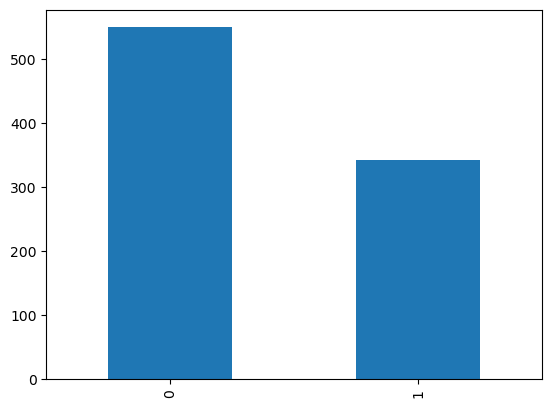

<Figure size 1000x1000 with 0 Axes>

In [12]:
data["Survived"].value_counts().plot(kind="bar")
plt.figure(figsize=(10,10))

<AxesSubplot:>

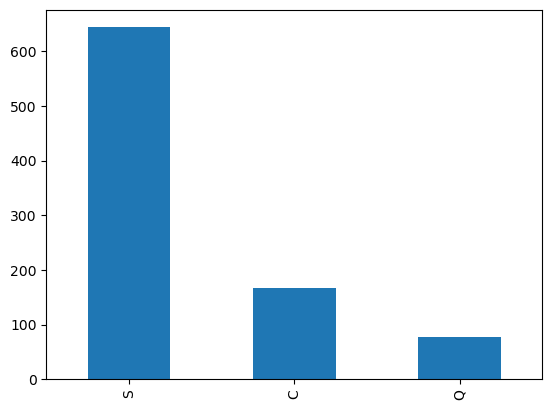

In [11]:
data["Embarked"].value_counts().plot(kind="bar")

<AxesSubplot:>

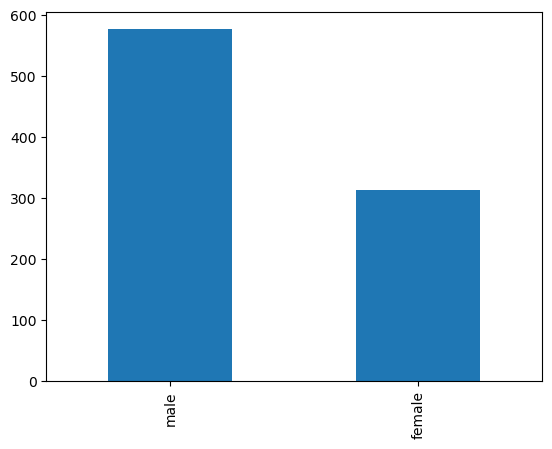

In [15]:
data["Sex"].value_counts().plot(kind="bar")

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data["name_title"]=data["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()

In [46]:
pd.pivot_table(data,index="Survived",columns="name_title",values="PassengerId",aggfunc="count")

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [53]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
name_title       0
dtype: int64

In [51]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [52]:
data.dropna(subset=["Embarked"],inplace=True)

In [61]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [65]:
data["ticket_letters"]=data["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

In [66]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_title,ticket_letters
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [67]:
data.drop(columns=["Ticket"],inplace=True)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_letters
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,0
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,0
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [86]:
ayush_dummies=pd.get_dummies(data[a])

In [81]:
a=list(data.columns)

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [92]:
ayush_dummies.drop(columns="PassengerId",inplace=True)

In [111]:
X_trian=ayush_dummies.iloc[:,1:].values

In [120]:
y_train=ayush_dummies.iloc[:,0].values.reshape(-1,1)

In [130]:
lr=LogisticRegression()
cv=cross_val_score(lr,X_trian,y_train,cv=5)
print(cv)
print(cv.mean())

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

[0.83707865 0.80898876 0.80337079 0.80337079 0.86440678]
0.8234431536850124


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
from sklearn.ensemble  import RandomForestClassifier

In [136]:
clf=RandomForestClassifier()
a1=cross_val_score(clf,X_trian,y_train,cv=5)
print(a1)
print(a1.mean())

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[0.80898876 0.79213483 0.84269663 0.74719101 0.80225989]
0.7986542245921412


In [140]:
clf1=SVC()
a=cross_val_score(clf1,X_trian,y_train,cv=5)
print(a.mean())

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.677178950041262


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
tree=DecisionTreeClassifier()
ae=cross_val_score(tree,X_trian,y_train,cv=5)
print(ae.mean())

0.7727797879768933
